# ================================================  
# Understanding Output Metrics
# ================================================

## Support

Support measures how frequent an itemset is across the entire dataset

Example:
- Dataset: 100 transactions
- 8 transactions have {Bread, Butter} together
- Then: Support(Bread, Butter) = 8/100 = 0.08 (8%)

=> Meaning: 8% of the customers bought both Bread and Butter together

## Confidence

Confidence measures how often item B occurs when item A appears

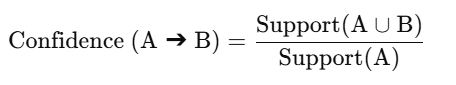

Example:
- 20 people bought Bread.
- 8 of them also bought Butter.
- Confidence(Bread ➔ Butter) = 8 /20 = 0.4 (40%)

=> Given that a customer bought Bread, there’s a 40% chance they also bought Butter

## Lift

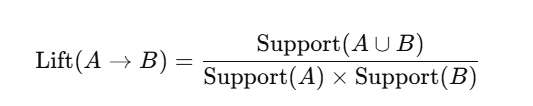

- Numerator = How often A and B occur together
- Denominator = How often A and B would occur together if they were independent

Interpretation:
- Lift > 1: A and B are positively correlated
- Lift = 1: A and B are independent
- Lift < 1: A and B are negatively correlated (bad for market basket)

=> If "bread ➔ butter" has a lift of 3, it means people who buy bread are 3 times more likely to also buy butter compared to random shoppers

# ================================================  
# Importing Libraries
# ================================================  

In [3]:
pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=b75a89d42262c3368f26eb1f20c5b49a82399f49ef1d88694bd2ab321f4d8913
  Stored in directory: c:\users\hasan\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install mlxtend pandas

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.6 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 2.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 2.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 3.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 3.1 MB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.4 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 3.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.4 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.4 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.1/11.1 MB 2.8 MB/s eta 0:00:04
   - -------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

from apyori import apriori as ap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules

# ================================================
# Importing Dataset
# ================================================

In [2]:
df = pd.read_csv('transactions_dataset.csv')

df

,transaction_id,item_id,order_timestamp,category,is_returned
0,1,bread,03/01/2024 7:11,Bakery,True
1,1,chicken,03/01/2024 7:11,Meat & Seafood,False
2,1,banana,03/01/2024 7:11,Fruits & Vegetables,False
3,2,coke,31/01/2024 2:05,Beverages,False
4,2,butter,31/01/2024 2:05,Dairy & Alternatives,False
...,...,...,...,...,...
2970,998,soap,31/01/2024 18:14,Personal Care,False
2971,999,eggs,31/01/2024 8:06,Dairy & Alternatives,True
2972,1000,pepsi,03/01/2024 16:50,Beverages,False
2973,1000,milk,03/01/2024 16:50,Dairy & Alternatives,False


# ================================================
# EDA
# ================================================


Top 10 Most Frequent Items:

        item_id  count  percentage_of_transactions
0          milk    182                       0.182
1         bread    170                       0.170
2     detergent    165                       0.165
3          coke    164                       0.164
4         apple    162                       0.162
5        cereal    162                       0.162
6        cheese    161                       0.161
7        yogurt    161                       0.161
8         pasta    160                       0.160
9  paper towels    160                       0.160


C:\Users\hasan\AppData\Local\Temp\ipykernel_22816\3149676155.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_freq.head(10)['count'], y=item_freq.head(10)['item_id'], palette=green_colors)


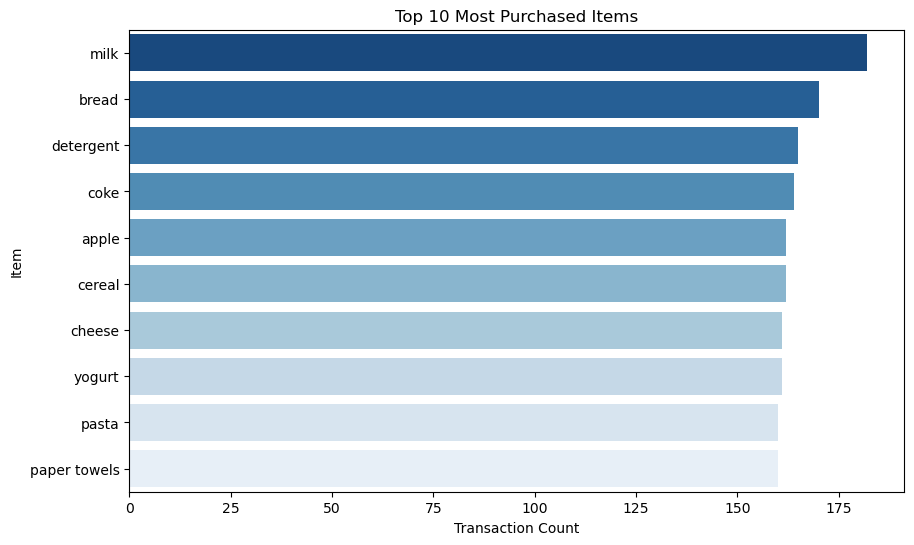

In [3]:
# top item frequencies

item_freq = df['item_id'].value_counts().reset_index()
total_unique_transactions = df['transaction_id'].nunique()
item_freq['percentage_of_transactions'] = round(item_freq['count'] / total_unique_transactions, 3)

print('\nTop 10 Most Frequent Items:\n')
print(item_freq.head(10))

plt.figure(figsize=(10, 6))
green_colors = sns.color_palette('Blues', n_colors=10)[::-1] # reversing the color scale of the 'Greens' palette
sns.barplot(x=item_freq.head(10)['count'], y=item_freq.head(10)['item_id'], palette=green_colors)
# for i, count in enumerate(item_freq['count'].head(10)): # # adding value labels
#     plt.text(count + 2, i, str(count), va='center')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Transaction Count')
plt.ylabel('Item')
plt.show()


Average Basket Size: 3


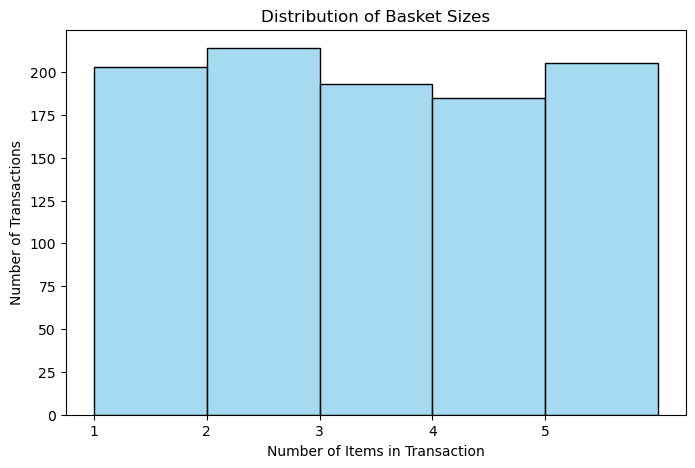

In [4]:
# Items per Basket

basket_size = df.groupby('transaction_id').agg(num_of_items=('item_id', 'count')).reset_index()
print("\nAverage Basket Size:", round(basket_size['num_of_items'].mean()))

plt.figure(figsize=(8, 5))
sns.histplot(data=basket_size['num_of_items'], bins=range(1, basket_size['num_of_items'].max() + 2), color='skyblue')
plt.title('Distribution of Basket Sizes')
plt.xlabel('Number of Items in Transaction')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, basket_size['num_of_items'].max() + 1))
plt.show()

In [5]:
# Checking for single-item transactions

single_item_transactions = np.squeeze(basket_size.loc[basket_size['num_of_items'] == 1, ['num_of_items']].count())
total_transaction_count = basket_size.shape[0]
# perc of single-item transactions
print(f'Percentage of Single-Item Transactions: {round((single_item_transactions/total_transaction_count) * 100, 1)} %')

# 80% of the total transactions still have atleast 2 items on which we can run our market basket anaysis

Percentage of Single-Item Transactions: 20.3 %


In [6]:
# checking for items that were returned after delivery

items_returned = np.squeeze(df.loc[df['is_returned'] == True, ['item_id']].count())
total_transaction_count = df.shape[0]
# perc of single-item transactions
print(f'Percentage of Items Returned: {round((items_returned/total_transaction_count) * 100, 1)} %')

# we will remove these 4.8% transaction items during the data pre-processing stage

Percentage of Items Returned: 4.8 %


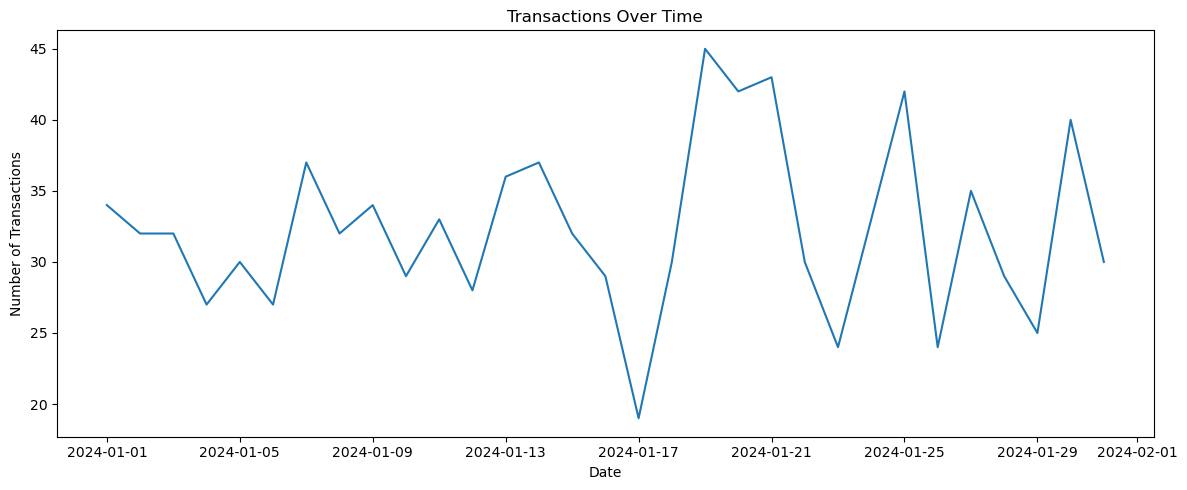

In [7]:
# Temporal Trends

df['date'] = pd.to_datetime(df['order_timestamp'], format='%d/%m/%Y %H:%M').dt.date
daily_transactions = df.groupby('date').agg(transactions=('transaction_id', 'nunique')).reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_transactions, x='date', y='transactions')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# when analyzing data of a longer time horizon, we can retrain the market basket analysis model by segments of time intervals based on seasonality

# ================================================
# Using mlxtend Library (Apriori Algorithm)
# ================================================

In [ ]:
# Notes
'''
Input Data Requirment:
- mlxtend.apriori() requires a boolean one-hot encoded DataFrame.

How the Alorithm works:
- Uses a bottom-up, breadth-first search approach
- Generates candidate itemsets of length 1 (e.g., {milk}, {bread})
- Counts their support in the dataset (i.e., how often they occur)
- Prunes itemsets below min_support
- Generates larger itemsets from surviving ones (e.g., {milk, bread})
- Repeats until no new frequent itemsets can be formed.

Pros:
- Avoids checking unnecessary combinations (i.e if an itemset is infrequent, all supersets are also infrequent)

Cons:
- Inefficient for large datasets (because of repeated scanning and candidate generation)
'''

### Data Processing

In [8]:
# one-hot encoding the transactions
basket = pd.crosstab(df['transaction_id'], df['item_id'])

# converting to boolean for better performance of apriori algo
basket_bool = basket.astype(bool)

basket_bool

item_id,apple,banana,beef,bread,butter,cereal,cheese,chicken,coke,detergent,eggs,milk,paper towels,pasta,pepsi,rice,shampoo,soap,yogurt
transaction_id,,,,,,,,,,,,,,,,,,,
1,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
5,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,True,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False
997,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
998,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False


### Running the Algorithm

In [9]:
# Finding frequent itemsets

frequent_itemsets = apriori(
    df=basket_bool, # provide one-hot encoded dataframe in boolean format (rows = transactions, columns = items)
    min_support=0.02, # min_support=0.02 means only itemsets appearing in >= 2% of all transactions are returned
    use_colnames=True, # if True, itemsets will be returned using item names instead of column indices (for cleaner data)
    max_len=3 # limits the maximum length of the itemsets (no min_len parameter exists)
)

frequent_itemsets

,support,itemsets
0,0.162,(apple)
1,0.142,(banana)
2,0.159,(beef)
3,0.170,(bread)
4,0.153,(butter)
...,...,...
149,0.024,"(pasta, rice)"
150,0.023,"(pasta, soap)"
151,0.021,"(yogurt, pasta)"
152,0.020,"(rice, shampoo)"


In [12]:
# generating rules
rules = association_rules(
    frequent_itemsets, # output of apriori() or fp_growth() function which finds the frequent combinations of products
    metric='lift', # which metric to use for filtering rules (other possible values: confidence, support)
    min_threshold=1 # lift > 1
)  

# converting antecedents and consequents into strings (for cleaner data)
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

rules.sort_values('lift', ascending=False).round(3).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,yogurt,bread,0.161,0.170,0.038,0.236,1.388,1.0,0.011,1.086,0.333,0.130,0.080,0.230
1,bread,yogurt,0.170,0.161,0.038,0.224,1.388,1.0,0.011,1.081,0.337,0.130,0.075,0.230
2,banana,cereal,0.142,0.162,0.030,0.211,1.304,1.0,0.007,1.062,0.272,0.109,0.059,0.198
3,cereal,banana,0.162,0.142,0.030,0.185,1.304,1.0,0.007,1.053,0.278,0.109,0.050,0.198
4,yogurt,cereal,0.161,0.162,0.034,0.211,1.304,1.0,0.008,1.062,0.278,0.118,0.059,0.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,yogurt,cheese,0.161,0.161,0.026,0.161,1.003,1.0,0.000,1.001,0.004,0.088,0.001,0.161
112,apple,shampoo,0.162,0.154,0.025,0.154,1.002,1.0,0.000,1.000,0.002,0.086,0.000,0.158
113,shampoo,apple,0.154,0.162,0.025,0.162,1.002,1.0,0.000,1.000,0.002,0.086,0.000,0.158
114,pepsi,paper towels,0.125,0.160,0.020,0.160,1.000,1.0,0.000,1.000,0.000,0.075,0.000,0.143


In [13]:
(
    rules
    .loc[:, ['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    .sort_values('lift', ascending=False)
    .round(3)
    .reset_index(drop=True)
)

,antecedents,consequents,support,confidence,lift
0,yogurt,bread,0.038,0.236,1.388
1,bread,yogurt,0.038,0.224,1.388
2,banana,cereal,0.030,0.211,1.304
3,cereal,banana,0.030,0.185,1.304
4,yogurt,cereal,0.034,0.211,1.304
...,...,...,...,...,...
111,yogurt,cheese,0.026,0.161,1.003
112,apple,shampoo,0.025,0.154,1.002
113,shampoo,apple,0.025,0.162,1.002
114,pepsi,paper towels,0.020,0.160,1.000


### Visualizing Rules

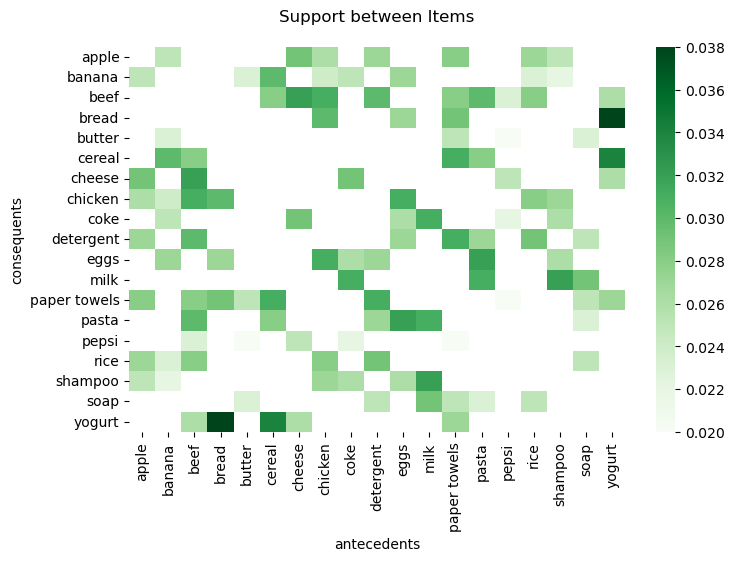

In [14]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

# Generate heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(support_table, cmap='Greens')
plt.title('Support between Items\n')
plt.show()


# ================================================
# Using mlxtend Library (FP-Growth Algorithm)
# ================================================

In [ ]:
# Notes
'''
- fpgrowth() requires a boolean one-hot encoded DataFrame
- It's faster and more memory-efficient than Apriori on larger datasets
'''

### Data Processing

In [15]:
# one-hot encoding the transactions

df_pivot = pd.crosstab(df['transaction_id'], df['item_id']).astype(bool)

df_pivot

item_id,apple,banana,beef,bread,butter,cereal,cheese,chicken,coke,detergent,eggs,milk,paper towels,pasta,pepsi,rice,shampoo,soap,yogurt
transaction_id,,,,,,,,,,,,,,,,,,,
1,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
5,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,True,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False
997,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
998,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False


In [16]:
# we can also one-hot encode all transactions into one big basket instead of grouping it on a transaction-level

# creating a list-of-lists because TransactionEncoder() requires that
list_of_lists = df.groupby('transaction_id')['item_id'].apply(list).tolist()
encoder = TransactionEncoder()
onehot = encoder.fit(list_of_lists).transform(list_of_lists)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()

,apple,banana,beef,bread,butter,cereal,cheese,chicken,coke,detergent,eggs,milk,paper towels,pasta,pepsi,rice,shampoo,soap,yogurt
0,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


### Running the Algorithm

In [17]:
frequent_itemsets = fpgrowth(
    df=df_pivot, # provide one-hot encoded dataframe in boolean format (rows = transactions, columns = items)
    min_support=0.02, # min_support=0.02 means only itemsets appearing in >= 2% of all transactions are returned
    use_colnames=True, # if True, itemsets will be returned using item names instead of column indices (for cleaner data)
    max_len=3 # limits the maximum length of the itemsets (no min_len parameter exists)
)

frequent_itemsets

,support,itemsets
0,0.170,(bread)
1,0.154,(chicken)
2,0.142,(banana)
3,0.164,(coke)
4,0.161,(cheese)
...,...,...
149,0.022,"(pepsi, coke)"
150,0.020,"(pepsi, apple)"
151,0.023,"(pepsi, beef)"
152,0.020,"(paper towels, pepsi)"


In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [19]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,chicken,bread,0.030,0.194805,1.145913
1,bread,chicken,0.030,0.176471,1.145913
2,chicken,beef,0.031,0.201299,1.266030
3,beef,chicken,0.031,0.194969,1.266030
4,chicken,apple,0.026,0.168831,1.042168
5,apple,chicken,0.026,0.160494,1.042168
6,chicken,rice,0.028,0.181818,1.173021
7,rice,chicken,0.028,0.180645,1.173021
8,chicken,eggs,0.031,0.201299,1.298701
9,eggs,chicken,0.031,0.200000,1.298701


### Visualizing Rules

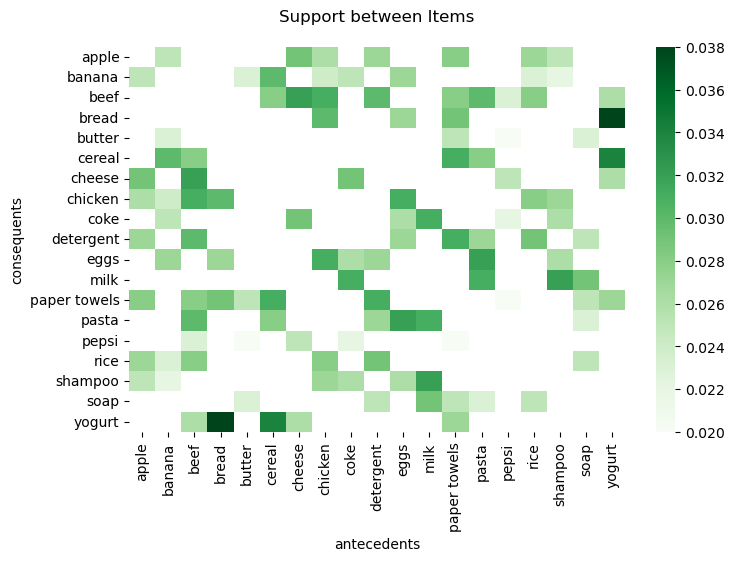

In [20]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

# Generate heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(support_table, cmap='Greens')
plt.title('Support between Items\n')
plt.show()
